In [14]:
import pandas as pd
data = pd.read_csv('labeled-sa-dataset.csv')
data.head()

,bangla,classes,labels
0,যত ভয়ের ব্যাপারটি নিয়ে মজা করছি তত ভয় লাগছে,fear,2
1,দ্য স্যাক্রেড ব্যান্ড অফ থিবস জনের দুর্ধর...,sadness,4
2,আকবর আলীর ভবিষ্যতে কি লেখা আছে জানিনা তবে তার...,joy,3
3,আমাদের সমাজ শেষ করে দিছে যারা সেবন করে তারাও...,fear,2
4,আমার ক্ষেত্রে ও এমন হয়েছিল যেখানে ফেল যাওয়ার...,sadness,4


In [15]:
from sklearn.model_selection import train_test_split

X = data.bangla
y = data.labels

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [16]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline


from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

In [17]:
lr_model = LogisticRegressionCV(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
# model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
model_names = ['Logistic Regression']
# ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]
ml_models = [lr_model]

In [18]:
def model_train(model, train_data, train_labels):
	pipe = Pipeline([
        ('FE', TfidfVectorizer(ngram_range=(1,2), use_idf = True, tokenizer=lambda x: x.split())),  
        ('Transformer', TfidfTransformer()),  
        ('M', model)
    ])
	pipe.fit(train_data, train_labels)
	return pipe

trained_ml_models = []
for i in ml_models:
    tt = model_train(i,train_data, train_labels)
    trained_ml_models.append(tt)

In [19]:
ac_list = []
pr_list = []
re_list = []
f1_list = []


def predict_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    global pred_y
    pred_y = md.predict(x_test)
    ac_list.append((round(accuracy_score(y_test,pred_y),4)*100))
    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100))
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    predict_results(md, test_data, test_labels, name)

performance_matrix = pd.DataFrame({'Accuracy':ac_list,'Precision':pr_list,
                                'Recall':re_list,'F1 Score':f1_list},
                                index =model_names)
performance_matrix

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,58.82,58.55,58.82,58.31


In [20]:
pred_y

array([3, 5, 4, ..., 5, 4, 3], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

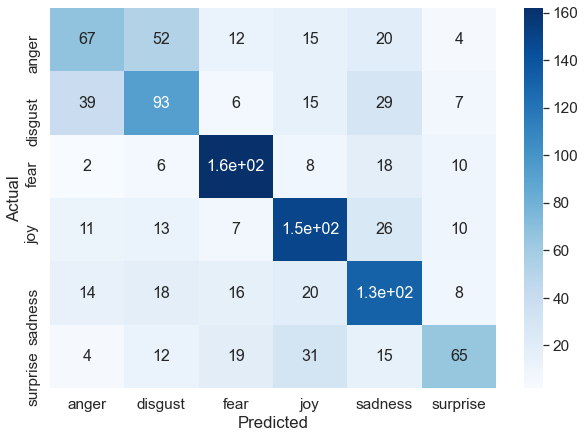

In [21]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np


data = confusion_matrix(test_labels, pred_y)
df_cm = pd.DataFrame(data, columns=np.unique(['anger','disgust','fear','joy','sadness','surprise']), index = np.unique(['anger','disgust','fear','joy','sadness','surprise']))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})